## Notes

This notebook only contains fitting and plotting code for the observed spectrum of HIP 65426 b as of January 2023, for the ExoGRAVITY collaboration. It does not include the code used to extract or flux calibrate this spectrum. The spectrum was extracted from one night of GRAVITY data for which there is a reliable on-axis observation, namely the Jan. 7th, 2021 observation of the system. The spectrum was extracted using the currently (as of Jan. 2023) ExoGRAVITY pipeline (see Appendix B in Nowak et al. 2020 for an outline of the data reduction steps), and flux calibrated using a BT-NextGen spectrum fit to archive photometry of the host, and scaled to match the SPHERE K1 photometry (about a factor of 0.5) of the companion. For more information on this, text for your paper, or for additional plots, contact W. Balmer :~)

This notebook assumes you have installed $\texttt{species}$, a toolkit for analyzing direct imaging observations. You can therefore change the model you fit to the observations (by default, the BT-Settl-Cifist model worked well when I was working on this target for the JWST ERS paper, but there are others listed on the species webpage), the number of live points, etc. and can save plots of the posterior of fit parameters, and the spectrum. 

In [53]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import spectres


In [ ]:
# optional, set my personal preference for plots
# you can use this cell to define your plotting style instead
# import seaborn as sb
# plt.rcParams['font.family'] = 'monospace'   # Fonts
# plt.rcParams['font.monospace'] = 'DejaVu Sans Mono'
# sb.set_context("paper")

In [2]:
# initialize species
# this notebook will work, even if you have a clean installation of the package
# see https://species.readthedocs.io/ for more
import species
species.SpeciesInit()
database = species.Database()

Initiating species v0.5.5... [DONE]
Database: /Users/bluez3303/Documents/GitHub/hip65426/species_database.hdf5
Data folder: /Users/bluez3303/Documents/GitHub/hip65426/data
Working folder: /Users/bluez3303/Documents/GitHub/hip65426
Grid interpolation method: linear


In [3]:
include_gravity = True

if include_gravity:
    filepref = 'results/with_gravity/'
else:
    filepref = 'results/with_sinfoni/'
if not os.path.isdir(filepref):
    os.mkdir(filepref)

In [4]:
# download and shape up the HIP 65426 b SPHERE spectrum
import urllib.request

urllib.request.urlretrieve(
    'https://home.strw.leidenuniv.nl/~stolker/species/spectra/hip65426_sphere_yjh.dat', 
    'data/hip65426_sphere_yjh.dat'
)

sphere_yjh = pd.read_csv('data/hip65426_sphere_yjh.dat', delim_whitespace=True, comment='#', names=['l','f','fe'])
sphere_yjh = sphere_yjh[2:]
sphere_yjh.to_csv('data/hip65426_sphere_yjh.dat', sep=' ', header=False, index=False)

# shape up the SINFONI spectrum
sinfoni = pd.read_csv('data/HIP_65426_B_final_noLSS_spec.txt', comment='#', delim_whitespace=True, usecols=[0,1,2,6], names=['l', 'f', 'fe', 'inst'])
sinfoni = sinfoni[sinfoni.inst == 'SINFONI-K']
sinfoni[['l','f','fe']].to_csv('data/sinfoni.dat', sep=' ', header=False, index=False)

In [5]:
plx = (9.3031,0.0346)

In [6]:
spectrum = {
  'SPHERE_IFU': ('data/hip65426_sphere_yjh.dat', None, 40.),
  'SINFONI-K': ('data/sinfoni.dat', None, 5577)
}

if include_gravity:
  spectrum['GRAVITY'] = (
    'data/HIP65426B_GRAVITYK_spectrum_fluxcal_scaled.fits', 
    'data/HIP65426B_GRAVITYK_spectrum_fluxcal_scaled.fits', 
    500.
  )

database.add_object(
  'HIP 65426 b',
  parallax=plx, app_mag=None, flux_density=None,
  spectrum=spectrum, deredden=None
)

Adding object: HIP 65426 b
   - Parallax (mas) = 9.30 +/- 0.03
   - Spectrum:
      - Database tag: SPHERE_IFU
      - Filename: data/hip65426_sphere_yjh.dat
      - Data shape: (37, 3)
      - Wavelength range (um): 0.99 - 1.64
      - Mean flux (W m-2 um-1): 5.54e-17
      - Mean error (W m-2 um-1): 5.45e-18
   - Spectrum:
      - Database tag: SINFONI-K
      - Filename: data/sinfoni.dat
      - Data shape: (1979, 3)
      - Wavelength range (um): 1.97 - 2.45
      - Mean flux (W m-2 um-1): 6.26e-17
      - Mean error (W m-2 um-1): 2.97e-17
   - GRAVITY spectrum:
      - Object: HIP 65426 B
      - Database tag: GRAVITY
      - Filename: data/HIP65426B_GRAVITYK_spectrum_fluxcal_scaled.fits
      - Data shape: (192, 3)
      - Wavelength range (um): 2.05 - 2.48
      - Mean flux (W m-2 um-1): 6.48e-17
      - Mean error (W m-2 um-1): 1.60e-17
   - GRAVITY covariance matrix:
      - Object: HIP 65426 B
      - Database tag: GRAVITY
      - Filename: data/HIP65426B_GRAVITYK_spectrum_fl

In [7]:
# add archival companion photometry
database.add_companion(name='HIP 65426 b')
objectbox = database.get_object(object_name='HIP 65426 b')

Adding object: HIP 65426 b
   - Parallax (mas) = 9.30 +/- 0.03
   - Paranal/SPHERE.IRDIS_D_H23_2:
      - Apparent magnitude = 17.94 +/- 0.05
      - Flux (W m-2 um-1) = 8.73e-17 +/- 4.02e-18
   - Paranal/SPHERE.IRDIS_D_H23_3:
      - Apparent magnitude = 17.58 +/- 0.06
      - Flux (W m-2 um-1) = 1.03e-16 +/- 5.70e-18
   - Paranal/SPHERE.IRDIS_D_K12_1:
      - Apparent magnitude = 17.01 +/- 0.09
      - Flux (W m-2 um-1) = 7.63e-17 +/- 6.33e-18
   - Paranal/SPHERE.IRDIS_D_K12_2:
      - Apparent magnitude = 16.79 +/- 0.09
      - Flux (W m-2 um-1) = 7.21e-17 +/- 5.98e-18
   - Paranal/NACO.Lp:
      - Apparent magnitude = 15.33 +/- 0.12
      - Flux (W m-2 um-1) = 3.88e-17 +/- 4.30e-18
   - Paranal/NACO.NB405:
      - Apparent magnitude = 15.23 +/- 0.22
      - Flux (W m-2 um-1) = 3.21e-17 +/- 6.55e-18
   - Paranal/NACO.Mp:
      - Apparent magnitude = 14.65 +/- 0.29
      - Flux (W m-2 um-1) = 2.99e-17 +/- 8.07e-18
Getting object: HIP 65426 b... [DONE]


<>:26: DeprecationWarning: invalid escape sequence '\l'
<>:27: DeprecationWarning: invalid escape sequence '\m'
<>:28: DeprecationWarning: invalid escape sequence '\m'
<>:26: DeprecationWarning: invalid escape sequence '\l'
<>:27: DeprecationWarning: invalid escape sequence '\m'
<>:28: DeprecationWarning: invalid escape sequence '\m'
/var/folders/y8/lw5f1dcj04g4txq4y2znyc200000gn/T/ipykernel_47876/4197430850.py:26: DeprecationWarning: invalid escape sequence '\l'
  ax[1].set_xlabel('$\lambda$ [$\mu$m]')
/var/folders/y8/lw5f1dcj04g4txq4y2znyc200000gn/T/ipykernel_47876/4197430850.py:27: DeprecationWarning: invalid escape sequence '\m'
  ax[0].set_ylabel('flux [W m$^{-2}$ $\mu$m$^{-1}$]')
/var/folders/y8/lw5f1dcj04g4txq4y2znyc200000gn/T/ipykernel_47876/4197430850.py:28: DeprecationWarning: invalid escape sequence '\m'
  ax[1].set_ylabel('flux [W m$^{-2}$ $\mu$m$^{-1}$]')



Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument. 



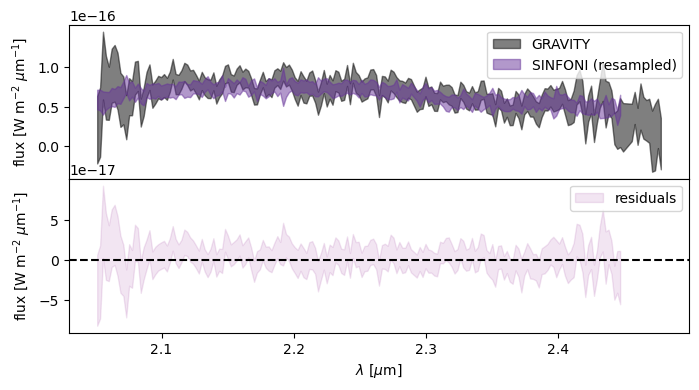

In [115]:
# make a plot comparing the SINFONI and GRAVITY spectra
gravity_spectrum = objectbox.spectrum['GRAVITY'][0]
sinfoni_spectrum = objectbox.spectrum['SINFONI-K'][0]

fig, ax = plt.subplots(2, 1, figsize=(8,4), sharex=True)
plt.subplots_adjust(hspace=0)
offset = 0

ax[0].fill_between(gravity_spectrum[:,0], offset + gravity_spectrum[:,1] + gravity_spectrum[:,2], offset + gravity_spectrum[:,1] - gravity_spectrum[:,2], color='k', alpha=0.5, label='GRAVITY')

# downsample the SINFONI data to directly compare with GRAVITY
sinfoni_equivalent_flux = np.zeros(len(gravity_spectrum))

gravity_wavelength = gravity_spectrum[:,0]
gravity_dlambda = gravity_wavelength[1] - gravity_wavelength[0]
sinfoni_dlambda = sinfoni_spectrum[1,0] - sinfoni_spectrum[0,0]

sinfoni_equivalent_flux, sinfoni_equivalent_flux_errs = spectres.spectres(gravity_wavelength, sinfoni_spectrum[:,0], sinfoni_spectrum[:,1], sinfoni_spectrum[:,2], fill=0)

ax[0].fill_between(
    gravity_wavelength[sinfoni_equivalent_flux>0], 
    offset + sinfoni_equivalent_flux[sinfoni_equivalent_flux>0] + sinfoni_equivalent_flux_errs[sinfoni_equivalent_flux>0],
    offset + sinfoni_equivalent_flux[sinfoni_equivalent_flux>0] - sinfoni_equivalent_flux_errs[sinfoni_equivalent_flux>0], color='rebeccapurple', alpha=0.5, label='SINFONI (resampled)'
)

ax[1].set_xlabel('$\lambda$ [$\mu$m]')
ax[0].set_ylabel('flux [W m$^{-2}$ $\mu$m$^{-1}$]')
ax[1].set_ylabel('flux [W m$^{-2}$ $\mu$m$^{-1}$]')

ax[0].set_yticks([0, 5e-17, 10e-17])

ax[1].set_yticks([-5e-17, 0, 5e-17])
ax[0].legend()

residuals = gravity_spectrum[:,1][sinfoni_equivalent_flux>0] - sinfoni_equivalent_flux[sinfoni_equivalent_flux>0]
residual_errors = np.sqrt(gravity_spectrum[:,2][sinfoni_equivalent_flux>0]**2 + sinfoni_equivalent_flux_errs[sinfoni_equivalent_flux>0]**2)

ax[1].axhline(0, color='k', ls='--')
ax[1].fill_between(
    gravity_wavelength[sinfoni_equivalent_flux>0],
      residuals + residual_errors, residuals - residual_errors, color='purple', alpha=0.1, label='residuals'
)
ax[1].legend()
plt.savefig('results/plots/gravity_vs_sinfoni.png', dpi=250)

In [9]:
database.add_object(
        'HIP 65426 b',
        parallax=plx,
        app_mag={ # Carter et al. ERS vegamag
                'JWST/NIRCAM.F250M':(17.163, 0.140),
                'JWST/NIRCAM.F300M':(16.827, 0.117),
                'JWST/NIRCAM.F356W':(16.067, 0.115),
                'JWST/NIRCAM.F410M':(15.781, 0.120),
                'JWST/NIRCAM.F444W':(15.701, 0.126),
                'JWST/MIRI.F1140C':(15.357, 0.093),
                'JWST/MIRI.F1550C':(15.197, 0.177)
        },
        spectrum=None, deredden=None)

# optionally, can include to remove NACO photometry that disagrees with JWST
database.delete_data('objects/HIP 65426 b/Paranal/NACO.Lp')
database.delete_data('objects/HIP 65426 b/Paranal/NACO.NB405')
database.delete_data('objects/HIP 65426 b/Paranal/NACO.Mp')


Adding object: HIP 65426 b
   - Parallax (mas) = 9.30 +/- 0.03
   - JWST/NIRCAM.F250M:
      - Apparent magnitude = 17.16 +/- 0.14
      - Flux (W m-2 um-1) = 3.45e-17 +/- 4.46e-18
   - JWST/NIRCAM.F300M:
      - Apparent magnitude = 16.83 +/- 0.12
      - Flux (W m-2 um-1) = 2.42e-17 +/- 2.61e-18
   - JWST/NIRCAM.F356W:
      - Apparent magnitude = 16.07 +/- 0.12
      - Flux (W m-2 um-1) = 2.51e-17 +/- 2.66e-18
   - JWST/NIRCAM.F410M:
      - Apparent magnitude = 15.78 +/- 0.12
      - Flux (W m-2 um-1) = 1.92e-17 +/- 2.13e-18
   - JWST/NIRCAM.F444W:
      - Apparent magnitude = 15.70 +/- 0.13
      - Flux (W m-2 um-1) = 1.57e-17 +/- 1.82e-18
   - JWST/MIRI.F1140C:
      - Apparent magnitude = 15.36 +/- 0.09
      - Flux (W m-2 um-1) = 5.25e-19 +/- 4.50e-20
   - JWST/MIRI.F1550C:
      - Apparent magnitude = 15.20 +/- 0.18
      - Flux (W m-2 um-1) = 1.74e-19 +/- 2.85e-20
Deleting data: objects/HIP 65426 b/Paranal/NACO.Lp... [DONE]
Deleting data: objects/HIP 65426 b/Paranal/NACO.NB40

In [10]:
model_choice = 'bt-settl-cifist'

In [11]:
database.add_model(model=model_choice, teff_range=(1000., 1700.))

Unpacking BT-Settl CIFIST model spectra (1.4 GB)...

KeyboardInterrupt: 

In [ ]:
inc_spec = True

inc_phot = [
'JWST/NIRCAM.F250M',
'JWST/NIRCAM.F300M',
'JWST/NIRCAM.F356W',
'JWST/NIRCAM.F410M',
'JWST/NIRCAM.F444W',
'JWST/MIRI.F1140C',
'JWST/MIRI.F1550C',
'Paranal/SPHERE.IRDIS_D_H23_2',
'Paranal/SPHERE.IRDIS_D_H23_3',
'Paranal/SPHERE.IRDIS_D_K12_1',
'Paranal/SPHERE.IRDIS_D_K12_2',
           ]

fit = species.FitModel(
        object_name='HIP 65426 b',
        model=model_choice,
        bounds={# 'teff': (1200., 1700.),
                # 'radius': (0.5, 2.),
                # 'SPHERE_IFU': ((0.5, 1.5), None),
                # 'GRAVITY': ((0.5, 1.5), None),
        },
        inc_phot=inc_phot,
        inc_spec=inc_spec,
        fit_corr=['SPHERE_IFU'],
        weights=None
)


In [ ]:
tag='hip65426-plusjwst'

In [ ]:
fit.run_multinest(tag=tag,
                  n_live_points=300,
                  output='multinest/',
                  prior={'mass': (7.1, 1.1)} # prior from evol model, can include or disregard
                 )

In [ ]:
post = species.plot_posterior(tag=tag,
                       offset=(-0.3 , -0.3),
                       # title_fmt=['.0f', '.2f', '.2f', '.2f', '.2f', '.2f', '.3f', '.1f'],
                       inc_luminosity=True,
                       inc_mass=True,
                       output='{}post.png'.format(filepref))

In [ ]:
samples = database.get_mcmc_spectra(tag=tag,
                                    random=30,
                                    wavel_range=None,
                                    spec_res=500.)

best = database.get_median_sample(tag=tag)

read_model = species.ReadModel(model=model_choice,
                               wavel_range=None)

modelbox = read_model.get_model(model_param=best,
                                spec_res=500.,
                                smooth=True)

objectbox = database.get_object(object_name='HIP 65426 b',
                                inc_phot=True,
                                inc_spec=True)

objectbox = species.update_spectra(objectbox=objectbox,
                                   model_param=best)

residuals = species.get_residuals(datatype='model',
                                  spectrum=model_choice,
                                  parameters=best,
                                  objectbox=objectbox,
                                  inc_phot=True,
                                  inc_spec=True)

synphot = species.multi_photometry(datatype='model',
                                   spectrum=model_choice,
                                   filters=objectbox.filters,
                                   parameters=best)

species.plot_spectrum(boxes=[samples, modelbox, objectbox, synphot],
                      filters=objectbox.filters,
                      residuals=residuals,
                      plot_kwargs=[{'ls': '-', 'lw': 0.2, 'color': 'gray'},
                                   {'ls': '-', 'lw': 1., 'color': 'black'},
                                   {'GRAVITY': {'marker': '.', 'ms': 5., 'mew': 0., 'color': 'seagreen', 'ls': 'none', 'alpha': 0.3, 'label': 'GRAVITY'},
                                    'SPHERE_IFU': {'marker': 's', 'ms': 5., 'mew': 0., 'color': 'cornflowerblue', 'ls': '', 'alpha': 1, 'label': 'SPHERE IFU'},
                                    'Paranal/NACO.Lp': {'marker': 's', 'ms': 5., 'color': 'tomato', 'ls': 'none', 'label':'NACO'},
                                    'Paranal/NACO.NB405': {'marker': 's', 'markersize': 5., 'color': 'tomato', 'ls': 'none'},
                                    'Paranal/NACO.Mp': {'marker': 's', 'markersize': 5., 'color': 'tomato', 'ls': 'none'},
                                    'JWST/NIRCAM.F250M': {'marker': 's', 'markersize': 5., 'color': 'xkcd:mustard', 'ls': 'none', 'label':'JWST/NIRCAM'},
                                    'JWST/NIRCAM.F300M': {'marker': 's', 'markersize': 5., 'color': 'xkcd:mustard', 'ls': 'none'},
                                    'JWST/NIRCAM.F356W': {'marker': 's', 'markersize': 5., 'color': 'xkcd:mustard', 'ls': 'none'},
                                    'JWST/NIRCAM.F410M': {'marker': 's', 'markersize': 5., 'color': 'xkcd:mustard', 'ls': 'none'},
                                    'JWST/NIRCAM.F444W': {'marker': 's', 'markersize': 5., 'color': 'xkcd:mustard', 'ls': 'none'},
                                    'JWST/MIRI.F1140C': {'marker': 's', 'markersize': 5., 'color': 'purple', 'ls': 'none', 'label':'JWST/MIRI'},
                                    'JWST/MIRI.F1550C': {'marker': 's', 'markersize': 5., 'color': 'purple', 'ls': 'none'},
                                    'Paranal/SPHERE.IRDIS_D_H23_2': {'marker': '^', 'ms': 5., 'mew': 0., 'color': 'cornflowerblue', 'ls': '', 'alpha': 1, 'label': 'SPHERE'},
                                    'Paranal/SPHERE.IRDIS_D_H23_3': {'marker': '^', 'ms': 5., 'mew': 0., 'color': 'cornflowerblue', 'ls': '', 'alpha': 1},
                                    'Paranal/SPHERE.IRDIS_D_K12_1': {'marker': '^', 'ms': 5., 'mew': 0., 'color': 'cornflowerblue', 'ls': '', 'alpha': 1},
                                    'Paranal/SPHERE.IRDIS_D_K12_2': {'marker': '^', 'ms': 5., 'mew': 0., 'color': 'cornflowerblue', 'ls': '', 'alpha': 1},
                                   },
                                    None],
                      xlim=(0.8, 20.),
                      # ylim=(1.15e-20, 2e-16),
                      ylim_res=(-6., 6.),
                      scale=('log', 'linear'),
                      offset=(-0.4, -0.05),
                      legend=[{'loc': 'lower left', 'frameon': False, 'fontsize': 11.},
                              {'loc': 'upper right', 'frameon': False, 'fontsize': 12.}],
                      figsize=(12., 6.),
                      quantity='flux density',
                      output=filepref+'HIP65426b-SED.pdf'
                     )